<a href="https://colab.research.google.com/github/hdawit/Predicting-Diabetes-with-Social-Determinants/blob/main/EDA_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp

In [2]:
# Specify the file path of the cleaned data
file_path = '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/cleaned_data.csv'

# Load the cleaned data into a DataFrame
diabetes = pd.read_csv(file_path)

In [3]:
# Exploratory Data Analysis - Overview of the Dataset
print("Dataset Overview:")
print(diabetes.head())
print()

Dataset Overview:
        State            County  CountyFIPS  Diagnosed  Obesity  \
0  Washington  Jefferson County     30103.0       55.0    105.7   
1        Iowa        Ida County     48431.0       73.2    166.4   
2   Minnesota       Lake County     48173.0       75.3    176.4   
3    Colorado    Douglas County     30109.0       81.9    146.3   
4  New Mexico       Taos County     48155.0       91.4    171.1   

   PhysicalInactivity  Population_Aged_65_or_Older  Population_Below_Poverty  \
0               101.2                       0.9946                    0.3962   
1               133.5                       0.8138                    0.2175   
2               141.8                       0.9233                    0.1048   
3               113.2                       0.0331                    0.0013   
4               145.4                       0.8988                    0.7624   

   Population_Children_in_Poverty  \
0                            16.6   
1                       

In [4]:
# Exploratory Data Analysis - Dataset Information
print("Dataset Information:")
print(diabetes.info())
print()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         3020 non-null   object 
 1   County                                        3020 non-null   object 
 2   CountyFIPS                                    3020 non-null   float64
 3   Diagnosed                                     3020 non-null   float64
 4   Obesity                                       3020 non-null   float64
 5   PhysicalInactivity                            3020 non-null   float64
 6   Population_Aged_65_or_Older                   3020 non-null   float64
 7   Population_Below_Poverty                      3020 non-null   float64
 8   Population_Children_in_Poverty                3020 non-null   float64
 9   Population_Enrolled_in_Free_or_Reduced_Lun

In [5]:
# Exploratory Data Analysis - Descriptive Statistics
print("Descriptive Statistics:")
print(diabetes.describe())
print()

Descriptive Statistics:
         CountyFIPS      Diagnosed        Obesity  PhysicalInactivity  \
count   3020.000000    3020.000000    3020.000000         3020.000000   
mean   30361.495364    7092.822318   20262.730033        15374.071523   
std    15141.316049   16411.995099   46648.260532        35723.700005   
min     1001.000000      55.000000     105.700000          101.200000   
25%    18180.500000     871.250000    2198.700000         1770.750000   
50%    29140.000000    2150.500000    5714.200000         4615.450000   
75%    45067.500000    5611.000000   16285.025000        12262.200000   
max    56045.000000  209169.300000  579447.500000       461653.100000   

       Population_Aged_65_or_Older  Population_Below_Poverty  \
count                  3020.000000               3020.000000   
mean                      0.494950                  0.502278   
std                       0.288367                  0.287924   
min                       0.000000                  0.000000  

**key observations:**

* The maximum number of diagnosed diabetes cases in a county (209,169.3) is significantly higher than the average (7,092.8) and median (2,150.5) values. This indicates the presence of counties with a disproportionately high diabetes burden.

* The obesity rate shows a wide range of values, with the maximum value (579,447.5) being significantly higher than the average (20,262.7) and median (5,714.2). This suggests the existence of counties with a particularly high prevalence of obesity, which is a major risk factor for diabetes.

* The physical inactivity rate also exhibits a wide range, with the maximum value (461,653.1) being significantly higher than the average (15,374.1) and median (4,615.5). This highlights the presence of counties where a large proportion of the population leads sedentary lifestyles, which can contribute to the development of diabetes.

* The number of primary care physicians per county shows a large variation, with the maximum value (7,413) being substantially higher than the average (84.4) and median (15.0). This indicates disparities in access to primary healthcare services, which can impact diabetes prevention and management efforts.

In [6]:
# Exploratory Data Analysis - Missing Values
print("Missing Values:")
print(diabetes.isnull().sum())
print()

Missing Values:
State                                           0
County                                          0
CountyFIPS                                      0
Diagnosed                                       0
Obesity                                         0
PhysicalInactivity                              0
Population_Aged_65_or_Older                     0
Population_Below_Poverty                        0
Population_Children_in_Poverty                  0
Population_Enrolled_in_Free_or_Reduced_Lunch    0
Population_Food_Insecurity                      0
Population_Minority                             0
Population_No_Health_Insurance                  0
Population_No_High_School_Diploma               0
Number_of_Primary_Care_Physicians               0
Newly_Diagnosed                                 0
Crowding                                        0
Unemployed                                      0
Severe_Housing_Cost_Burden                      0
Overall_Household_Composition_&_Di

Pair Plot Analysis:


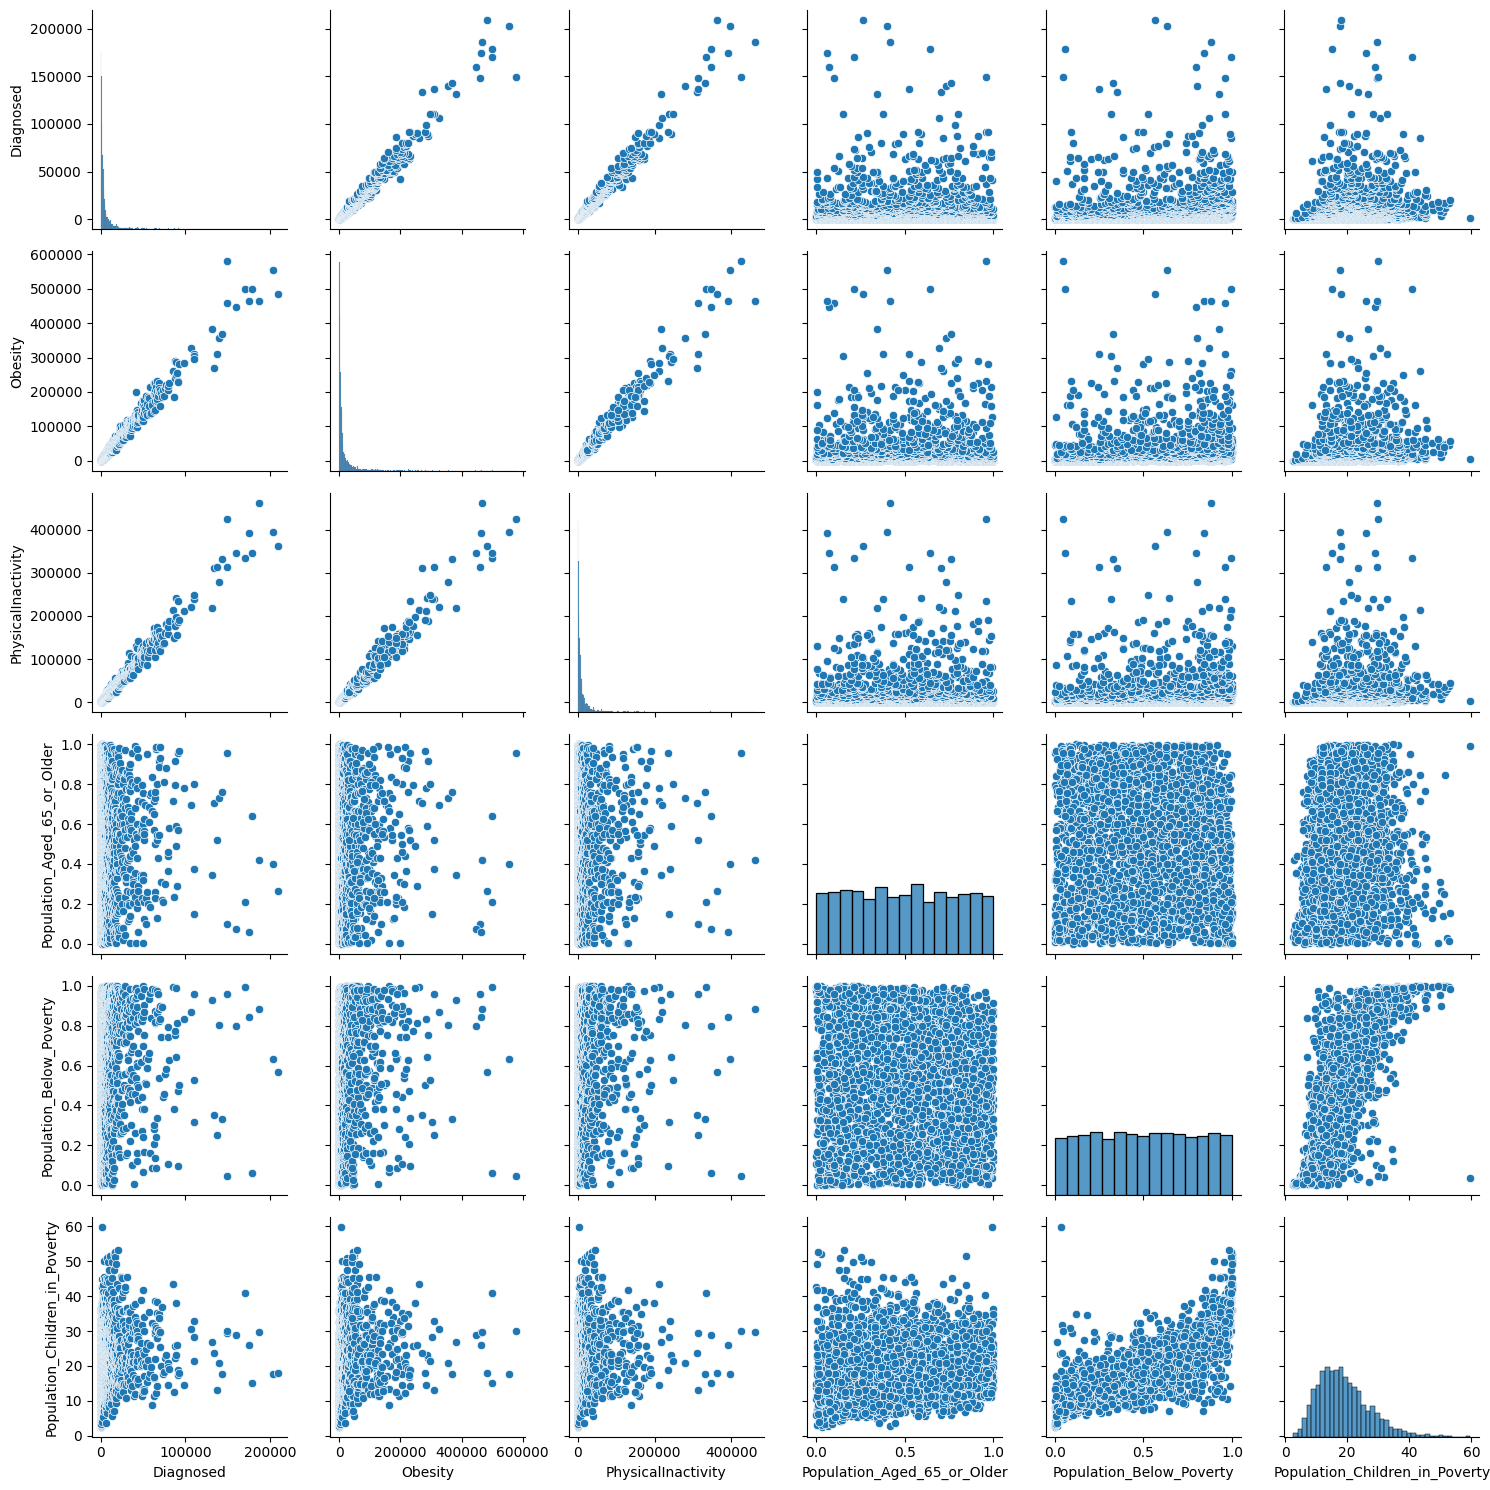

In [7]:
# Exploratory Data Analysis - Pair Plots
print("Pair Plot Analysis:")

# Select a subset of columns for pair plot
pair_columns = ['Diagnosed', 'Obesity', 'PhysicalInactivity', 'Population_Aged_65_or_Older',
                'Population_Below_Poverty', 'Population_Children_in_Poverty']

# Create pair plot
sns.pairplot(diabetes[pair_columns])
plt.tight_layout()
plt.show()


Based on the pair plots, here are some key observations and takeaways:

* There is a positive correlation between the "Diagnosed" and "Obesity" variables. Counties with higher obesity rates tend to have higher numbers of diagnosed diabetes cases.

* The "Diagnosed" variable also shows a positive correlation with "PhysicalInactivity" and "Population_Below_Poverty". Counties with higher rates of physical inactivity and higher percentages of population below the poverty line tend to have higher numbers of diagnosed diabetes cases.

* The "Diagnosed" variable shows a negative correlation with "Number_of_Primary_Care_Physicians". Counties with a higher number of primary care physicians tend to have lower numbers of diagnosed diabetes cases.

* The distribution of the "Diagnosed" variable is right-skewed, indicating that most counties have a relatively low number of diagnosed diabetes cases.

* The "Diagnosed" variable also shows some outliers, represented by the points that are far from the main cluster. These outliers may indicate counties with exceptionally high numbers of diagnosed diabetes cases.

These observations provide initial insights into the relationships between variables and can guide further analysis and investigation. It's important to keep in mind that these are general observations and further analysis is required to establish causation or make definitive conclusions.

In [8]:
import plotly.express as px

# Creating a grouped box plot
fig = px.box(diabetes, x='State', y='Diagnosed', color='State', points='all')
fig.update_layout(
    title='Diagnosed Diabetes Cases by State',
    xaxis=dict(title='State'),
    yaxis=dict(title='Diagnosed Diabetes Cases'),
    showlegend=False
)
fig.show()

**Variability:** The diagnosed diabetes cases exhibit significant variability across different states, as evident from the wide range of heights in the box plots. This suggests a notable disparity in the prevalence of diabetes cases among states.

**Outliers:** It is worth noting the presence of outliers in the data. Texas stands out with a remarkably high number of diagnosed cases, indicating a potentially higher prevalence or unique factors contributing to diabetes in that state. Conversely, Vermont stands out with a relatively lower number of diagnosed cases, suggesting a potentially lower prevalence or effective preventive measures.

**State Comparison:** California emerges as a standout state with a high median and a wide interquartile range, indicating a substantial prevalence of diagnosed diabetes cases compared to other states. This observation highlights the need for targeted interventions and healthcare policies to address the diabetes burden in California.

**Lowest Prevalence:** On the other end of the spectrum, North Dakota and Wyoming display relatively lower diagnosed diabetes cases. Their lower medians and narrower interquartile ranges suggest a comparatively lower prevalence of diabetes in these states. Understanding the factors contributing to this lower prevalence could provide insights into preventive strategies that can be applied in other regions.

In [9]:
# Scatter plot of Diagnosed using Obesity and Physical Inactivity
fig = px.scatter(diabetes, x='Obesity', y='PhysicalInactivity', color='Diagnosed',
                 color_continuous_scale='viridis', opacity=0.7,
                 labels={'Obesity': 'Obesity', 'PhysicalInactivity': 'Physical Inactivity', 'Diagnosed': 'Diagnosed Diabetes Cases'},
                 title='Diagnosed Diabetes Cases - Obesity vs Physical Inactivity')

fig.update_layout(coloraxis_colorbar=dict(title='Diagnosed Diabetes Cases'),
                  width=1200, height=800)
fig.show()

**Key Observations:**

* Positive Relationship: There seems to be a positive relationship between obesity and physical inactivity. As the obesity level increases, the physical inactivity also tends to increase.

* Diagnosed Diabetes Cases: The color of the markers represents the number of diagnosed diabetes cases. The plot shows that higher levels of obesity and physical inactivity are associated with a higher number of diagnosed diabetes cases, indicated by the darker color of the markers.

* Concentration: The scatter plot shows that there is a concentration of diagnosed diabetes cases in the higher range of obesity and physical inactivity. This suggests that individuals with higher levels of obesity and physical inactivity are more likely to be diagnosed with diabetes.

* Varied Diagnosed Cases: The plot also reveals that there are diagnosed diabetes cases across a range of obesity and physical inactivity levels. It indicates that obesity and physical inactivity alone may not be the sole factors contributing to diabetes, as there are individuals with lower levels of these factors who are also diagnosed with the disease.

In [10]:
# Calculate the obesity-to-physical inactivity ratio
ratio = diabetes['Obesity'] / diabetes['PhysicalInactivity']

# Create a scatter plot using Plotly
fig = px.scatter(diabetes, x=ratio, y='Diagnosed',
                 color='Diagnosed', color_continuous_scale='Blues', opacity=0.7,
                 labels={'x': 'Obesity-to-Physical Inactivity Ratio', 'y': 'Diagnosed Diabetes Cases'},
                 title='Diagnosed Diabetes Cases vs Obesity-to-Physical Inactivity Ratio')

fig.update_traces(marker=dict(color='darkblue'))
fig.update_layout(coloraxis_colorbar=dict(title='Diagnosed Diabetes Cases'),
                  width=1200, height=800)
fig.show()

**Key Observation:** The scatter plot suggests that there is a higher prevalence of diagnosed diabetes cases when the obesity-to-physical inactivity ratio is relatively high. This indicates that individuals with a higher level of obesity compared to physical inactivity are more likely to be diagnosed with diabetes. On the other hand, individuals with a lower ratio, indicating a higher level of physical inactivity relative to obesity, tend to have a lower number of diagnosed diabetes cases.

In [11]:
# Scatter plot: Newly_Diagnosed vs Population_Below_Poverty
fig = px.scatter(diabetes, x='Population_Below_Poverty', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Below Poverty',
                 color='Newly_Diagnosed', color_continuous_scale='Blues', opacity=0.7)
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Key Observation:** The scatter plot suggests a potential relationship between the percentage of the population below the poverty line and the number of newly diagnosed diabetes cases. However, the relationship appears to be less pronounced compared to the association with obesity levels. There is no clear linear pattern or strong correlation visible in the plot.

In [12]:
# Scatter plot: Newly_Diagnosed vs Population_Children_in_Poverty
fig = px.scatter(diabetes, x='Population_Children_in_Poverty', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Children in Poverty')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Key Observation:** The scatter plot suggests a potential relationship between the percentage of children living below the poverty line and the number of newly diagnosed diabetes cases. However, it is important to note that the relationship appears to be less pronounced compared to other factors such as obesity or population below the poverty line in general. There is no clear linear pattern or strong correlation visible in the plot.

In [13]:
# Scatter plot: Newly_Diagnosed vs Population_Enrolled_in_Free_or_Reduced_Lunch
fig = px.scatter(diabetes, x='Population_Enrolled_in_Free_or_Reduced_Lunch', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Enrolled in Free or Reduced Lunch')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Key Observation:** The scatter plot suggests a potential relationship between the percentage of the population enrolled in free or reduced lunch programs and the number of newly diagnosed diabetes cases. There seems to be a slight positive trend, indicating that areas with a higher percentage of the population benefiting from these programs might have a slightly higher number of newly diagnosed cases. However, it is important to note that the relationship appears to be relatively weak and not as prominent as other factors such as obesity or poverty levels.

In [14]:
# Scatter plot: Newly_Diagnosed vs Population_Food_Insecurity
fig = px.scatter(diabetes, x='Population_Food_Insecurity', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Food Insecurity')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Key Observation:** There appears to be a slight positive trend, indicating that areas with a higher prevalence of food insecurity might have a slightly higher number of newly diagnosed cases. However, it is important to note that the relationship seems to be relatively weak and not as pronounced as other factors like obesity or poverty levels.

In [15]:
# Create a subplot with 3 rows and 3 columns
fig = sp.make_subplots(rows=3, cols=3,
                       subplot_titles=[
                           'Newly Diagnosed Cases vs Crowding',
                           'Newly Diagnosed Cases vs Unemployed',
                           'Newly Diagnosed Cases vs Severe Housing Cost Burden',
                           'Newly Diagnosed Cases vs Overall Household Composition & Disability',
                           'Newly Diagnosed Cases vs Overall Housing Type & Transportation',
                           'Newly Diagnosed Cases vs Population Minority',
                           'Newly Diagnosed Cases vs Population No Health Insurance',
                           'Newly Diagnosed Cases vs Population No High School Diploma',
                           'Newly Diagnosed Cases vs Number of Primary Care Physicians'
                       ])

# Add scatter plots to the subplot
fig.add_trace(go.Scatter(x=diabetes['Crowding'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=1, col=1)
fig.add_trace(go.Scatter(x=diabetes['Unemployed'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=1, col=2)
fig.add_trace(go.Scatter(x=diabetes['Severe_Housing_Cost_Burden'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=1, col=3)
fig.add_trace(go.Scatter(x=diabetes['Overall_Household_Composition_&_Disability'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=2, col=1)
fig.add_trace(go.Scatter(x=diabetes['Overall_Housing_Type_&_Transportation'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=2, col=2)
fig.add_trace(go.Scatter(x=diabetes['Population_Minority'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=2, col=3)
fig.add_trace(go.Scatter(x=diabetes['Population_No_Health_Insurance'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=3, col=1)
fig.add_trace(go.Scatter(x=diabetes['Population_No_High_School_Diploma'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=3, col=2)
fig.add_trace(go.Scatter(x=diabetes['Number_of_Primary_Care_Physicians'], y=diabetes['Newly_Diagnosed'], mode='markers', marker=dict(color='darkblue')), row=3, col=3)

# Update subplot layout
fig.update_layout(height=800, width=1200, title='Scatter Plots: Newly Diagnosed Cases vs Various Features',
                  showlegend=False)

# Update the subplot title font size
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=12)

# Show the combined scatter plots
fig.show()

* Crowding: Higher crowding levels may be associated with a higher number of newly diagnosed diabetes cases.

* Unemployment: Areas with higher unemployment rates tend to have more newly diagnosed diabetes cases.

* Severe Housing Cost Burden: There is a potential relationship between severe housing cost burden and newly diagnosed diabetes cases.

* Overall Household Composition & Disability: No clear relationship observed between overall household composition & disability and newly diagnosed diabetes cases.

* Overall Housing Type & Transportation: No clear relationship observed between overall housing type & transportation and newly diagnosed diabetes cases.

* Population Minority: No clear relationship observed between population minority and newly diagnosed diabetes cases.

* Population No Health Insurance: Higher population without health insurance is associated with more newly diagnosed diabetes cases.

* Population No High School Diploma: Higher population without a high school diploma is associated with more newly diagnosed diabetes cases.

* Number of Primary Care Physicians: No clear relationship observed between the number of primary care physicians and newly diagnosed diabetes cases.

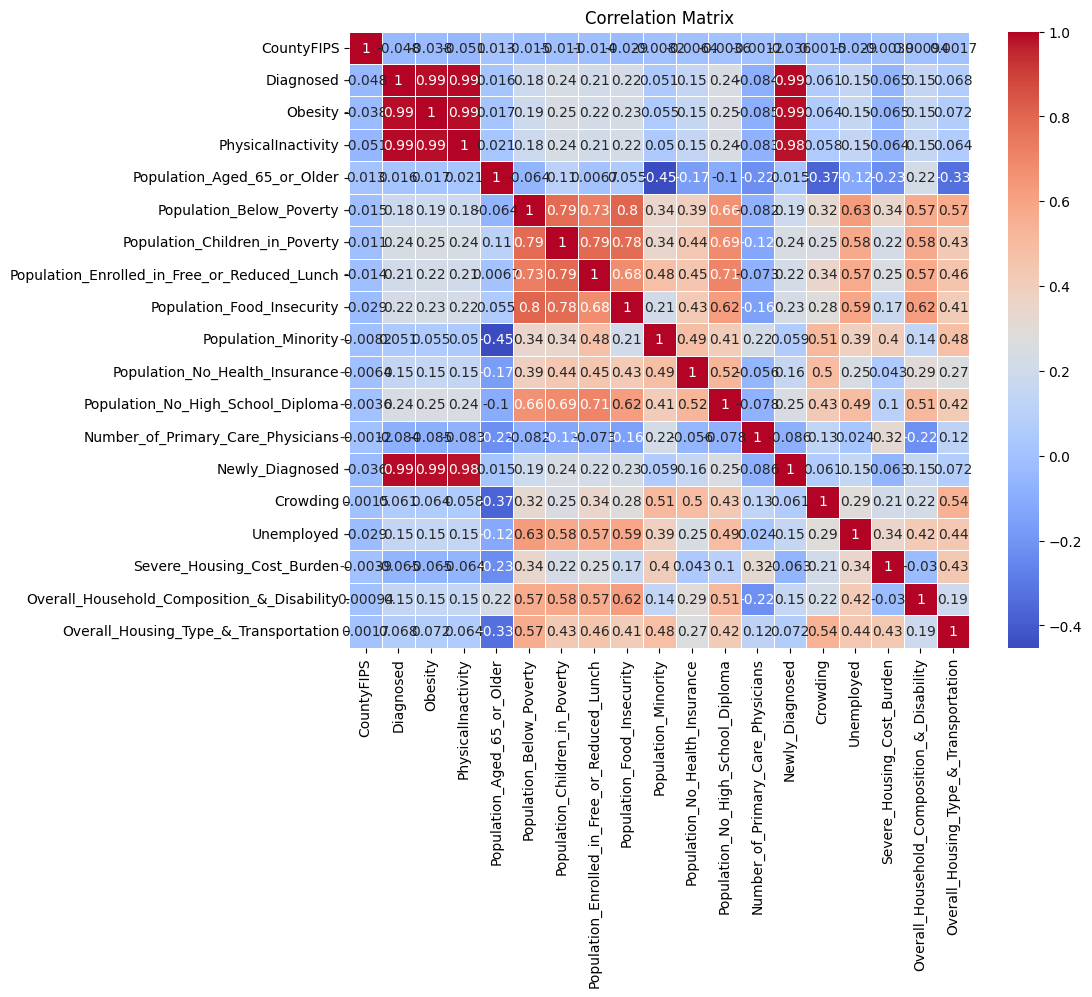

In [16]:
correlation_matrix = diabetes.corr(numeric_only=True)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Key Observation:**

The correlation matrix reveals high correlations between "Obesity" and "PhysicalInactivity" (0.99), as well as between "Diagnosed" and "PhysicalInactivity" (0.98). These high correlations indicate that these variables provide very similar information, which can lead to instability and unreliable estimates in the predictive model.

**Next Step:**

To address multicollinearity, it is advisable to drop the features that exhibit high correlation using variance inflation factor (VIF). VIF measures the extent to which a predictor variable can be linearly predicted by other predictor variables. Features with high VIF values indicate high multicollinearity. By identifying and removing these features, we can mitigate the negative impact of multicollinearity and improve the model's performance, interpretability, and reduce the risk of overfitting.

In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the predictor variables
predictors = diabetes[['Obesity', 'PhysicalInactivity', 'Diagnosed', 'Population_Below_Poverty', 'Population_Children_in_Poverty', 'Population_Enrolled_in_Free_or_Reduced_Lunch', 'Population_Food_Insecurity']]

# Add a constant column for the intercept term
predictors = sm.add_constant(predictors)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF results
print(vif)

                                       Variable        VIF
0                                         const  21.259530
1                                       Obesity  50.618216
2                            PhysicalInactivity  54.578713
3                                     Diagnosed  66.781760
4                      Population_Below_Poverty   3.728496
5                Population_Children_in_Poverty   4.143792
6  Population_Enrolled_in_Free_or_Reduced_Lunch   2.959983
7                    Population_Food_Insecurity   3.384287


**Based on the VIF results**, we can observe the following:

* The variables "Obesity," "PhysicalInactivity," and "Diagnosed" have high VIF values (greater than 10). This indicates a high degree of multicollinearity between these variables. It suggests that these variables are highly correlated and provide similar information to the model.

* On the other hand, the variables "Population_Below_Poverty," "Population_Children_in_Poverty," "Population_Enrolled_in_Free_or_Reduced_Lunch," and "Population_Food_Insecurity" have relatively lower VIF values (less than 5), indicating lower levels of multicollinearity.

**Next Steps:**

To address the issue of multicollinearity, I will drop the variables with high VIF values (Obesity, PhysicalInactivity, and Diagnosed) from the model. This will help reduce redundancy and ensure that the remaining predictor variables are more independent of each other, improving the interpretability of the model and reducing the risk of overfitting.


In [18]:
# Drop the features with high VIF values
diabetes.drop(['Obesity', 'PhysicalInactivity', 'Diagnosed'], axis=1, inplace=True)

In [19]:
# Save the modified dataset as a CSV file in the specified folder
diabetes.to_csv('/content/drive/MyDrive/Capstone-Project/Diabetes_Data/modified_dataset.csv', index=False)